In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from scipy.stats import mannwhitneyu
%matplotlib inline

Датасет - выгрузка из БД продаж торговой компании. 
Названия компаний, продукты, категории, суммы анонимизированы без потери смысла.

Задача: 
- Сегментировать клиентов на группы (задача кластеризации), для передачи в отдел маркетинга портрета клиентской группы для дальнейшего формирования целевых маркетенговых акций. (разделение должно быть максимально интерпретируемо)

In [140]:
# Датасет уже собран
load = pd.read_csv('Сводная клиентов.csv', index_col=0)

In [141]:
# Копируем фрейм
data = load.copy()

In [142]:
data.head()

,"К-во известных юрлиц, шт","К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
ID,,,,,,,,,,,,,,,
0,151,2,377,4,9,44,12914047.56,59584.0,1787,0,3.974518,3.184423,50.840484,216.736835,18.133333
1,1,1,7,1,1,5,120279.90,410.0,135,1773,4.000000,4.000000,43.979167,293.365610,2.200000
2,1,1,37,3,4,5,139671.66,133.0,107,1779,3.215385,2.892308,55.630769,1050.162857,2.400000
3,1,1,6,2,3,3,25920.43,6.0,69,1108,2.500000,2.833333,48.166667,4320.071667,1.000000
4,1,1,18,1,1,3,104113.59,205.0,1038,647,4.000000,4.000000,54.097826,507.871171,1.000000


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4395 entries, 0 to 4545
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   К-во известных юрлиц, шт                   4395 non-null   int64  
 1   К-во филиалов, шт                          4395 non-null   int64  
 2   Товарный ассортимент, шт                   4395 non-null   int64  
 3   К-во групп покупаемых товаров, шт          4395 non-null   int64  
 4   К-во специализаций покупаемых товаров, шт  4395 non-null   int64  
 5   Кол-во типов покупаемых товаров, шт        4395 non-null   int64  
 6   Сумма покупок за все время, руб            4395 non-null   float64
 7   Общее к-во покупок за все время, шт        4395 non-null   float64
 8   К-во дней сотрудничества                   4395 non-null   int64  
 9   К-во дней с последней покупки              4395 non-null   int64  
 10  Ранг популярности групп 

<h5> Описание информации </h5>

- ID - уникальный идентификатор клиента

- К-во известных юрлиц, шт - количество различных лиц которые оформляли покупку

- К-во филиалов, шт - количество филиалов с которыми работает клиент

Товарный ассортимент, шт - Количество различных товаров которые покупает клиент за все время

3 ранговых значения:
- Ранг популярности групп товаров
- Ранг популярности спец товаров
- Ранг популярности типов товаров  

- Cреднее значение популярности групп товаров покупки. Чем выше показатель, тем более популярна данная категория товаров у клиентов компании.


- Дней взаимодействия в месяц - к-во дней в месяце когда клиент делает заказ

- Остальные данные понятны из наименования колонок


In [144]:
data.describe()

,"К-во известных юрлиц, шт","К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
count,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.00000,4.395000e+03,4.395000e+03,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000
mean,1.034130,1.016837,18.652787,1.525597,2.054835,5.16223,1.448345e+06,6.224669e+03,592.235722,773.369511,3.710569,3.909390,51.232731,inf,1.346376
std,2.262621,0.128676,36.560324,0.734089,1.540515,4.85749,9.263051e+06,3.944147e+04,654.866296,648.558532,0.481259,0.977118,7.365322,NaN,0.888201
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.250000,1.000000,11.000000,0.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.576035e+04,3.200000e+01,1.000000,119.000000,3.625000,3.747644,47.520408,219.015756,1.000000
50%,1.000000,1.000000,7.000000,1.000000,1.000000,4.00000,8.793236e+04,2.210000e+02,307.000000,674.000000,3.997001,4.000000,52.123967,337.885000,1.000000
75%,1.000000,1.000000,18.000000,2.000000,3.000000,7.00000,5.106657e+05,1.570000e+03,1090.500000,1387.000000,4.000000,4.034483,56.000000,639.472105,1.333333
max,151.000000,2.000000,772.000000,4.000000,11.000000,44.00000,2.954126e+08,1.305468e+06,1908.000000,1907.000000,4.000000,6.000000,62.000000,inf,18.133333


Из таблицы видим, что есть клиенты с 0 покупок, по стоимости 0 посмотрим на эти данные подробнее

In [145]:
data[data['Общее к-во покупок за все время, шт'] == 0]

,"К-во известных юрлиц, шт","К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
ID,,,,,,,,,,,,,,,
1460,1,1,15,1,3,11,2.842171e-13,0.0,2,883,4.0,3.363636,49.772727,inf,2.0


In [146]:
data[data['Сумма покупок за все время, руб'] == 0]

,"К-во известных юрлиц, шт","К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
ID,,,,,,,,,,,,,,,
1577,1,1,5,2,2,2,0.0,5.0,1,1303,2.2,2.0,54.8,0.0,1.0
4240,1,1,1,1,1,1,0.0,1.0,1,1876,2.0,1.0,53.0,0.0,1.0


Это явно частные случаи, эти данные дропнем.

In [147]:
data = data.drop(index = data[data['Общее к-во покупок за все время, шт'] == 0].index)
data = data.drop(index = data[data['Сумма покупок за все время, руб'] == 0].index)

Визуализируем данные:

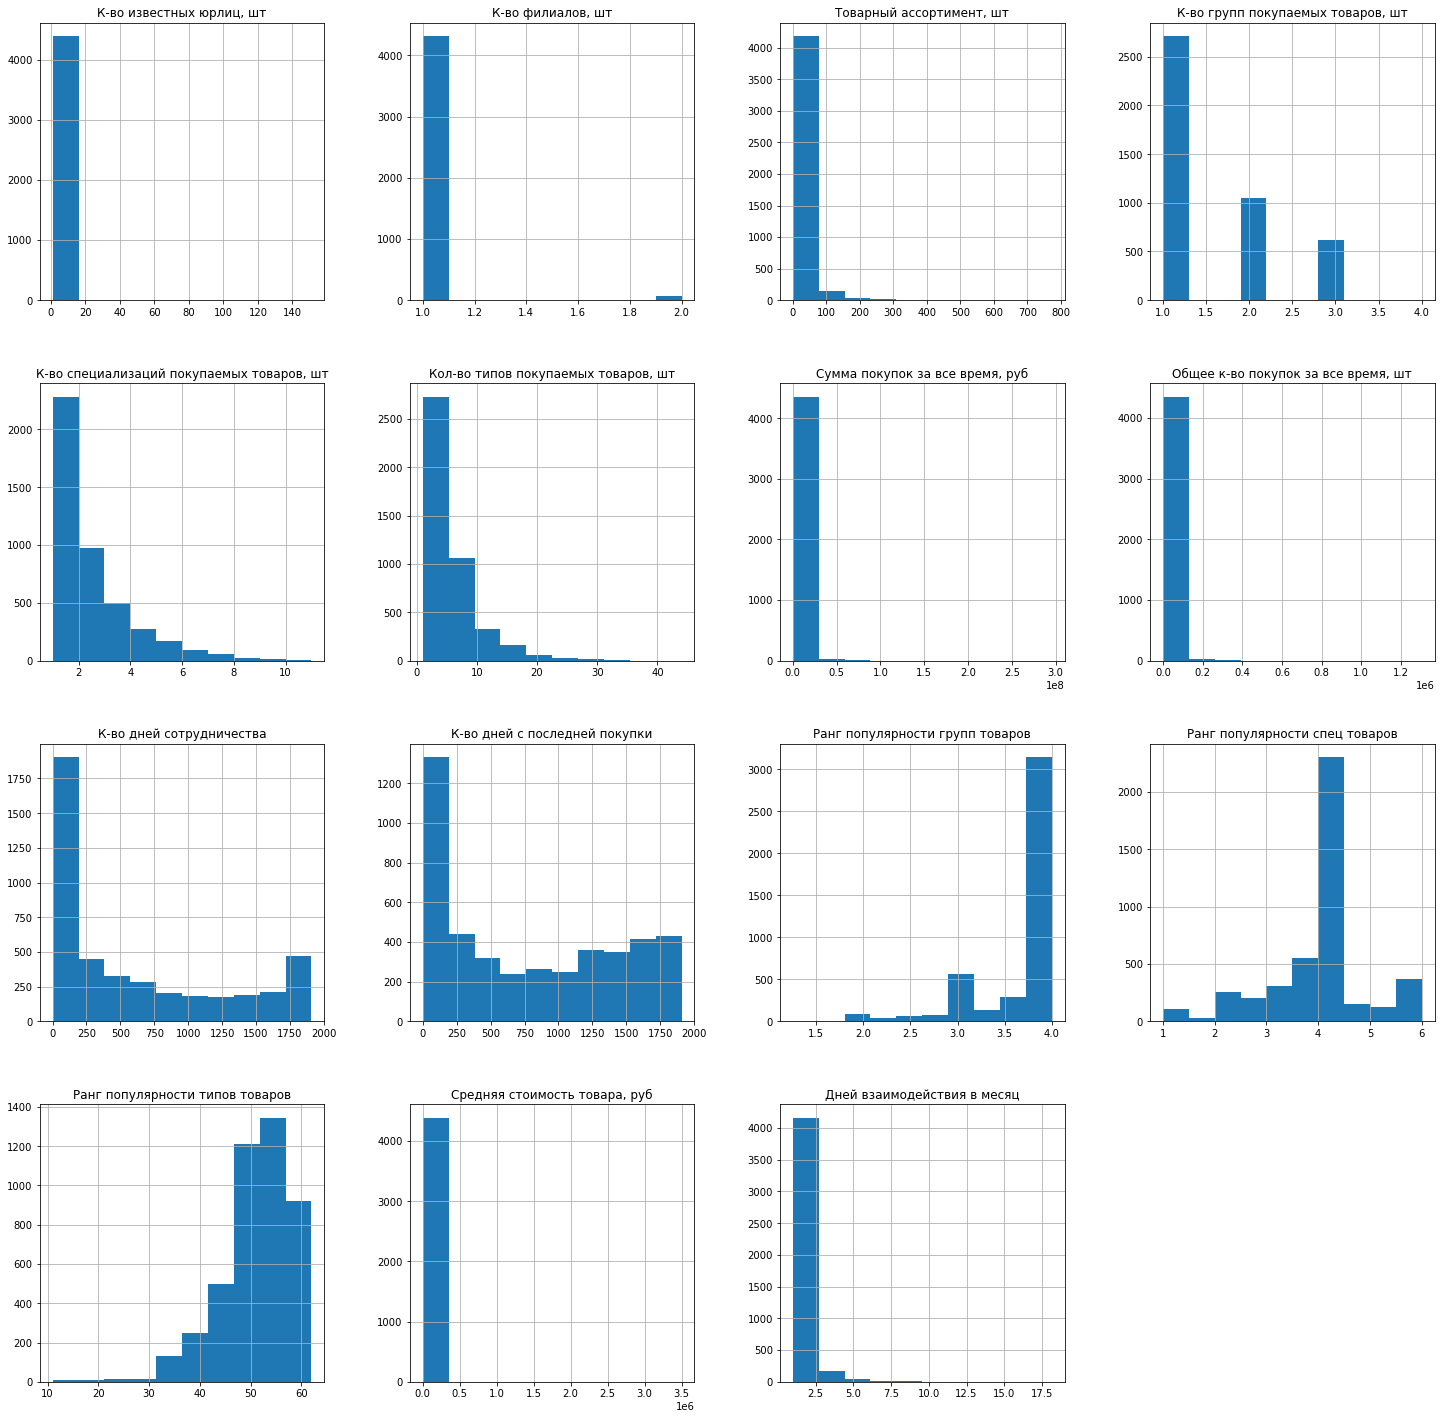

In [148]:
data.hist(figsize=(25, 25));

In [149]:
data.columns

Index(['К-во известных юрлиц, шт', 'К-во филиалов, шт',
       'Товарный ассортимент, шт', 'К-во групп покупаемых товаров, шт',
       'К-во специализаций покупаемых товаров, шт',
       'Кол-во типов покупаемых товаров, шт',
       'Сумма покупок за все время, руб',
       'Общее к-во покупок за все время, шт', 'К-во дней сотрудничества',
       'К-во дней с последней покупки', 'Ранг популярности групп товаров',
       'Ранг популярности спец товаров', 'Ранг популярности типов товаров',
       'Средняя стоимость товара, руб', 'Дней взаимодействия в месяц'],
      dtype='object')

In [150]:
data['К-во известных юрлиц, шт'].value_counts()

1      4391
151       1
Name: К-во известных юрлиц, шт, dtype: int64

In [151]:
data['Товарный ассортимент, шт'].value_counts()

1      669
2      394
3      289
4      270
5      236
      ... 
188      1
163      1
100      1
74       1
205      1
Name: Товарный ассортимент, шт, Length: 188, dtype: int64

In [152]:
data['Дней взаимодействия в месяц'].value_counts().sort_index()

1.000000     2538
1.016667        1
1.022727        2
1.027778        3
1.030303        4
             ... 
11.694444       1
12.375000       1
12.708333       1
12.861111       1
18.133333       1
Name: Дней взаимодействия в месяц, Length: 632, dtype: int64

Данные с выбросами:

- 'К-во известных юрлиц, шт', - дропнем колонка состоит из 1 категории плюс выброс
- 'Товарный ассортимент, шт', - прологарифмируем
- 'Сумма покупок за все время, руб', - прологарифмируем
- 'Общее к-во покупок за все время, шт', - прологарифмируем
- 'Средняя стоимость товара, руб', - прологарифмируем
- 'Дней взаимодействия в месяц' - округлим до целого, и взглянем повторно

In [153]:
data = data.drop(columns='К-во известных юрлиц, шт')

In [154]:
data.head()

,"К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
ID,,,,,,,,,,,,,,
0,2,377,4,9,44,12914047.56,59584.0,1787,0,3.974518,3.184423,50.840484,216.736835,18.133333
1,1,7,1,1,5,120279.90,410.0,135,1773,4.000000,4.000000,43.979167,293.365610,2.200000
2,1,37,3,4,5,139671.66,133.0,107,1779,3.215385,2.892308,55.630769,1050.162857,2.400000
3,1,6,2,3,3,25920.43,6.0,69,1108,2.500000,2.833333,48.166667,4320.071667,1.000000
4,1,18,1,1,3,104113.59,205.0,1038,647,4.000000,4.000000,54.097826,507.871171,1.000000


In [155]:
data['Товарный ассортимент, шт'] = np.log(data['Товарный ассортимент, шт'])
data['Сумма покупок за все время, руб'] = np.log(data['Сумма покупок за все время, руб'])
data['Общее к-во покупок за все время, шт'] = np.log(data['Общее к-во покупок за все время, шт'])
data['Средняя стоимость товара, руб'] = np.log(data['Средняя стоимость товара, руб'])

In [156]:
data['Дней взаимодействия в месяц'] = data['Дней взаимодействия в месяц'].round()

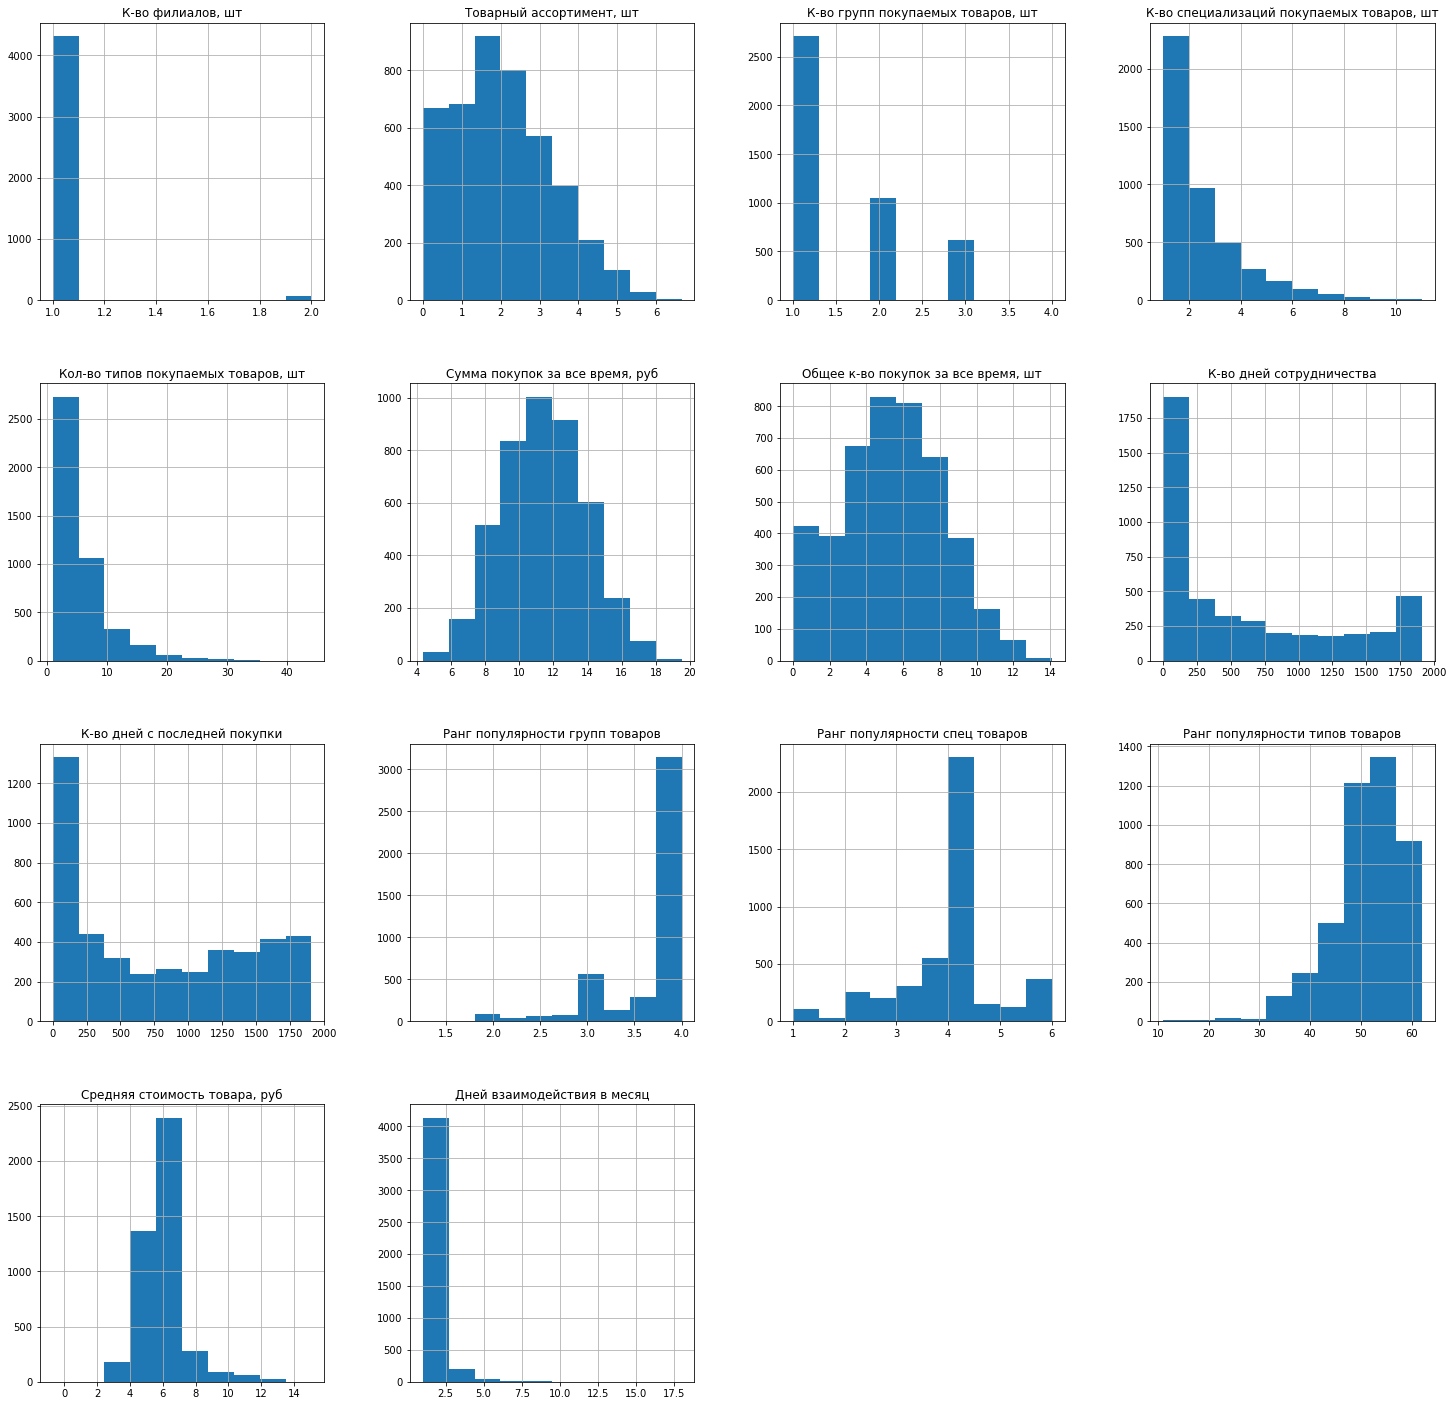

In [157]:
data.hist(figsize=(25, 25));

<h5>Проведем масштабирование данных</h5>

In [158]:
# Алгоритм кластеризации работает с расстояниями поэтому исопльзуем MinMax scale
class MyScaler():
    def __init__(self, columns=None):
        self.columns = columns
    
    def __repr__(self):
        return f'MyScaler метод MinMax scale'

    def fit_transform(self, data_in):
        data = data_in.copy()
        if not self.columns:
            for column in data:
                scaler = MinMaxScaler()
                data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
        else:
            for column in self.columns:
                scaler = MinMaxScaler()
                data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
        print('Выполнено')
        return data

In [159]:
# До обработки
data.describe()

,"К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,1.016849,1.989008,1.525729,2.054872,5.162568,11.412190,5.407471,592.639344,772.972905,3.711236,3.910611,51.231849,6.004719,1.323315
std,0.128719,1.342551,0.734219,1.540893,4.857709,2.417286,2.762349,654.907737,648.515142,0.480169,0.976004,7.367559,1.295228,0.919796
min,1.000000,0.000000,1.000000,1.000000,1.000000,4.345881,0.000000,1.000000,0.000000,1.250000,1.000000,11.000000,-0.716137,1.000000
25%,1.000000,1.098612,1.000000,1.000000,1.000000,9.670225,3.465736,1.000000,119.000000,3.625000,3.750000,47.509058,5.389552,1.000000
50%,1.000000,1.945910,1.000000,1.000000,4.000000,11.385793,5.400420,307.000000,673.000000,3.997039,4.000000,52.123712,5.822783,1.000000
75%,1.000000,2.890372,2.000000,3.000000,7.000000,13.143915,7.361058,1091.750000,1387.000000,4.000000,4.034483,56.000000,6.460473,1.000000
max,2.000000,6.648985,4.000000,11.000000,44.000000,19.503884,14.082072,1908.000000,1907.000000,4.000000,6.000000,62.000000,15.068274,18.000000


In [160]:
scale = MyScaler()
data_scaled = scale.fit_transform(data)

Выполнено


In [161]:
# После обработки
data_scaled.describe()

,"К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,0.016849,0.299145,0.175243,0.105487,0.096804,0.466177,0.383997,0.310246,0.405335,0.894995,0.582122,0.788860,0.425791,0.019019
std,0.128719,0.201918,0.244740,0.154089,0.112970,0.159473,0.196161,0.343423,0.340071,0.174607,0.195201,0.144462,0.082057,0.054106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.165230,0.000000,0.000000,0.000000,0.351256,0.246110,0.000000,0.062402,0.863636,0.550000,0.715864,0.386818,0.000000
50%,0.000000,0.292663,0.000000,0.000000,0.069767,0.464435,0.383496,0.160461,0.352910,0.998923,0.600000,0.806347,0.414264,0.000000
75%,0.000000,0.434709,0.333333,0.200000,0.139535,0.580422,0.522725,0.571972,0.727320,1.000000,0.606897,0.882353,0.454664,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h5>Модель понижения размерности</h5>

In [162]:
# Функция изуализирует поле компоненты

def display_in_2D_space(components_df, labels=None):
    frame_labels = pd.DataFrame(labels)
    components_with_labels_df = pd.concat([components_df, frame_labels], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

<h3> TSNE понижение размерности </h3>

Модель TSNE строит новое пространство с n-измерениями, переносит в него точки из многомерного пространства исходного фрейма сохраняя вероятность положения точек в пространстве (из многомерного в двумерное).

Метод имеет гиперпараметры на входе, которые изменяют результат.
Фактически данный метод - работает для визуализации многомерного пространства в 2D, и только для этого.

In [163]:
%%time
# Обучим модель понижения размерности на базе алгоритма TSNE
reduce_model = TSNE(n_components=2, random_state=42, perplexity=100)
components = reduce_model.fit_transform(data_scaled)

C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 3min 13s
Wall time: 56.9 s


In [164]:
# Подготовим фрейм для визуализации
colnames = ['component_' + str(i) for i in range(1, 3)]
components_df = pd.DataFrame(data = components, columns = colnames)

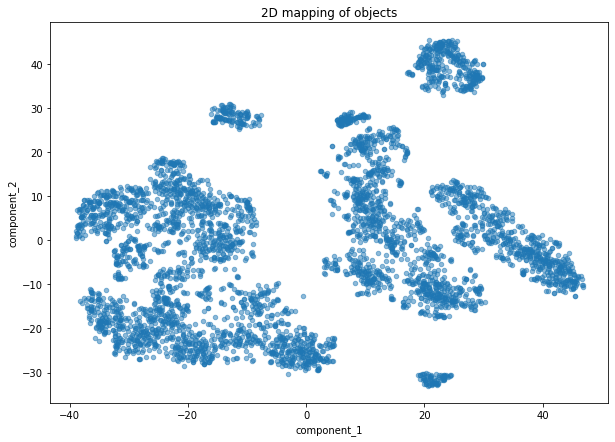

In [165]:
display_in_2D_space(components_df)

<h3>Далее обучим модели кластеризации, визуализируем их работу</h3>

<h4>Модель KMeans</h4>

In [166]:
from sklearn.cluster import KMeans

In [167]:
from sklearn.metrics import silhouette_score

In [168]:
# Реализация метода локтя
def apply_elbow_method(X, best_k=None):
    """
    Визуализация подбора лучших значений гиперпараметров KMeans для метода локтя
    Суть в том, что метод KMeans разбивает n-мерное пространство данных на количество кластеров
    определяемых гиперпараметром.
    Дальше данная функция визуализирует зависимость внутриклассового растояния от количества кластеров.
    При определенном значении кластров наблюдаем излом - рядом с этим значением +-1 кластер лежит оптимум функции
    
    """
    
    # Сюда записываем данные
    distortions = []
    
    # Разби
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    if best_k:
        plt.plot([best_k, best_k], [min(distortions), max(distortions)], color='r',linestyle='--')
    plt.xlabel('k, количество кластеров')
    plt.xticks(K)
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.grid()
    plt.show()

In [169]:
# Реализация метода локтя
def apply_silhuette_method(X):
    '''
    Визуализация для метода силуэта
    Суть в том, что метод рассчитывает среднекласстерное расстояние до центра.
    Считает среднее растояние до ближайшего кластера, и нормирует разность на большее из 2 величин.
    По сути, выбирается лучшее соотношение 'плотности' кластеров и их 'обособленности' 
    '''
    km_silhouette = []
    db_score = []
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        preds = kmeanModel.predict(X)
    
        silhouette = silhouette_score(X, preds)
        km_silhouette.append(silhouette)
        
    # Лучшее количество кластеров
    best_k = max(zip(km_silhouette[1:], K[1:]))[1]
    
    plt.figure(figsize=(10, 8))
    plt.plot(K, km_silhouette, 'bx-')
    plt.plot([best_k, best_k], [min(km_silhouette), max(km_silhouette)], color='r', linestyle='--')
    plt.xlabel('k, количество кластеров')
    plt.xticks(K)
    plt.ylabel('silhouette_score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.grid()
    plt.show()
    return best_k

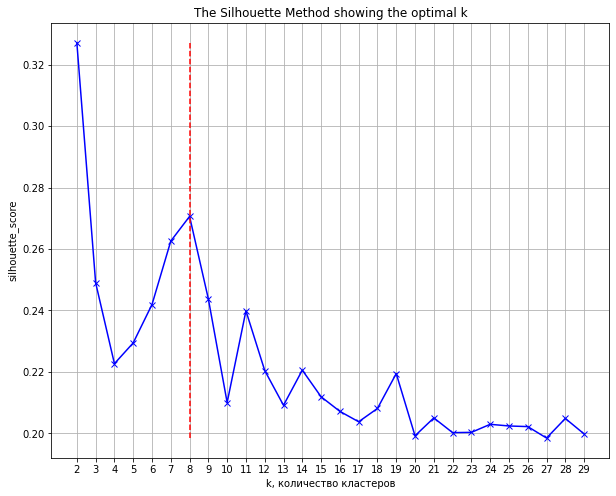

CPU times: total: 1min 20s
Wall time: 30.7 s


In [170]:
%%time
# Оптимальное количество кластеров по методу силуэта 
# функция сразу отмечает искомый кластер и возвращает его значение
best_k = apply_silhuette_method(data_scaled)

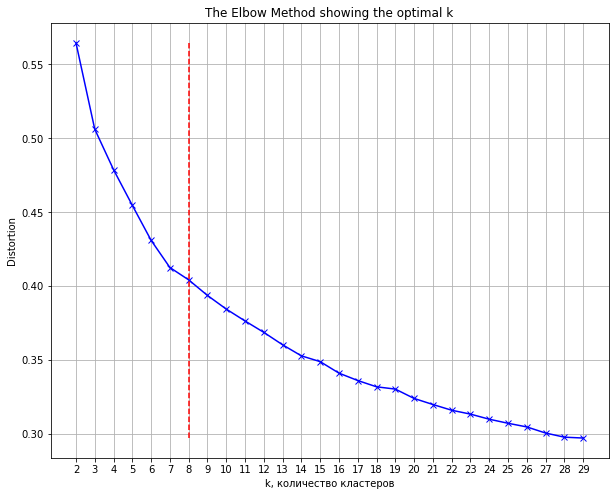

CPU times: total: 45.7 s
Wall time: 15.9 s


In [171]:
%%time
# Оптимальное количество кластеров по методу локтя, разметка лучшего количества взята из метода силуэта
# (+/- 1 кластер от 'локтя', т.к. количество дискретно, а искомый оптимум функции может лежать между значениями кластеров)

apply_elbow_method(data_scaled, best_k)

<h3>Визуализируем результат при k = 8 (количество групп) определенном методами локтя и силуэта</h3>

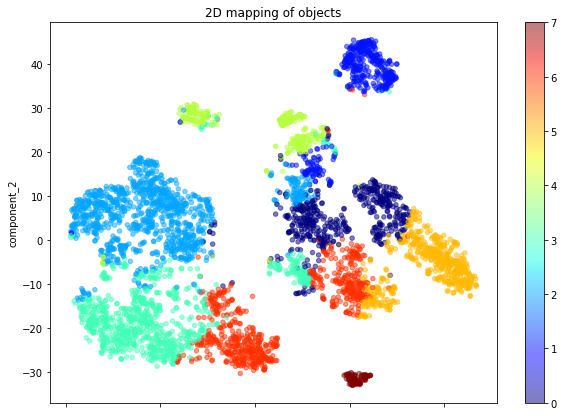

In [172]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_clast_km = kmeans.fit_predict(data_scaled)
display_in_2D_space(components_df, labels_clast_km)

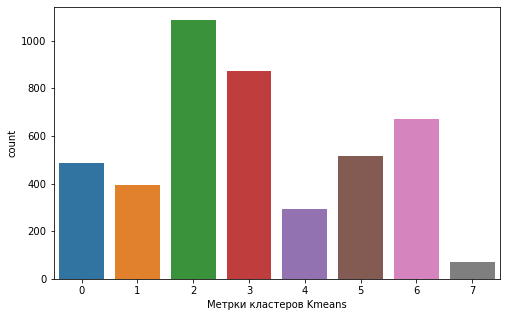

In [173]:
plt.figure(figsize=(8, 5))
sns.countplot(x=pd.Series(labels_clast_km))
plt.xlabel('Метрки кластеров Kmeans');

<h4>Модель DBSCAN</h4>

In [174]:
# Обучим 2 модель кластеризации на базе алгоритма DBSCAN
from sklearn.cluster import DBSCAN

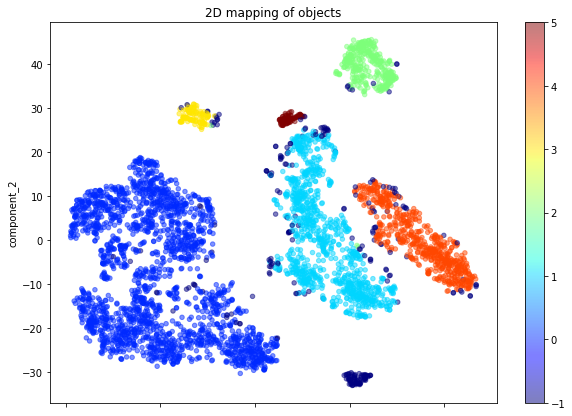

In [175]:
# В несколько итераций добиваемся лучшего варианта разбиения регулируя показатели eps и min_samples

dbscan = DBSCAN(eps=0.3363, min_samples=13)
labels_clast_DB = dbscan.fit_predict(data_scaled)
display_in_2D_space(components_df, labels_clast_DB)

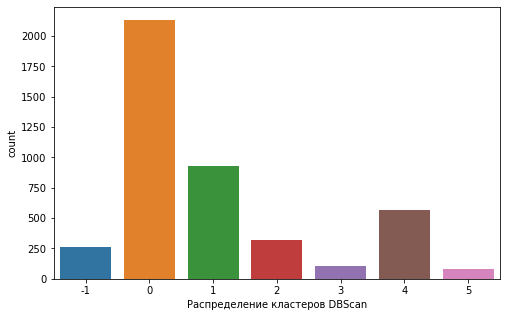

In [176]:
plt.figure(figsize=(8, 5))
sns.countplot(x=pd.Series(labels_clast_DB))
plt.xlabel('Распределение кластеров DBScan');

<h5>Для определения возможности анализа предложенных групп построим боксплоты для каждой группы</h5>

<h3>KMeans</h3>

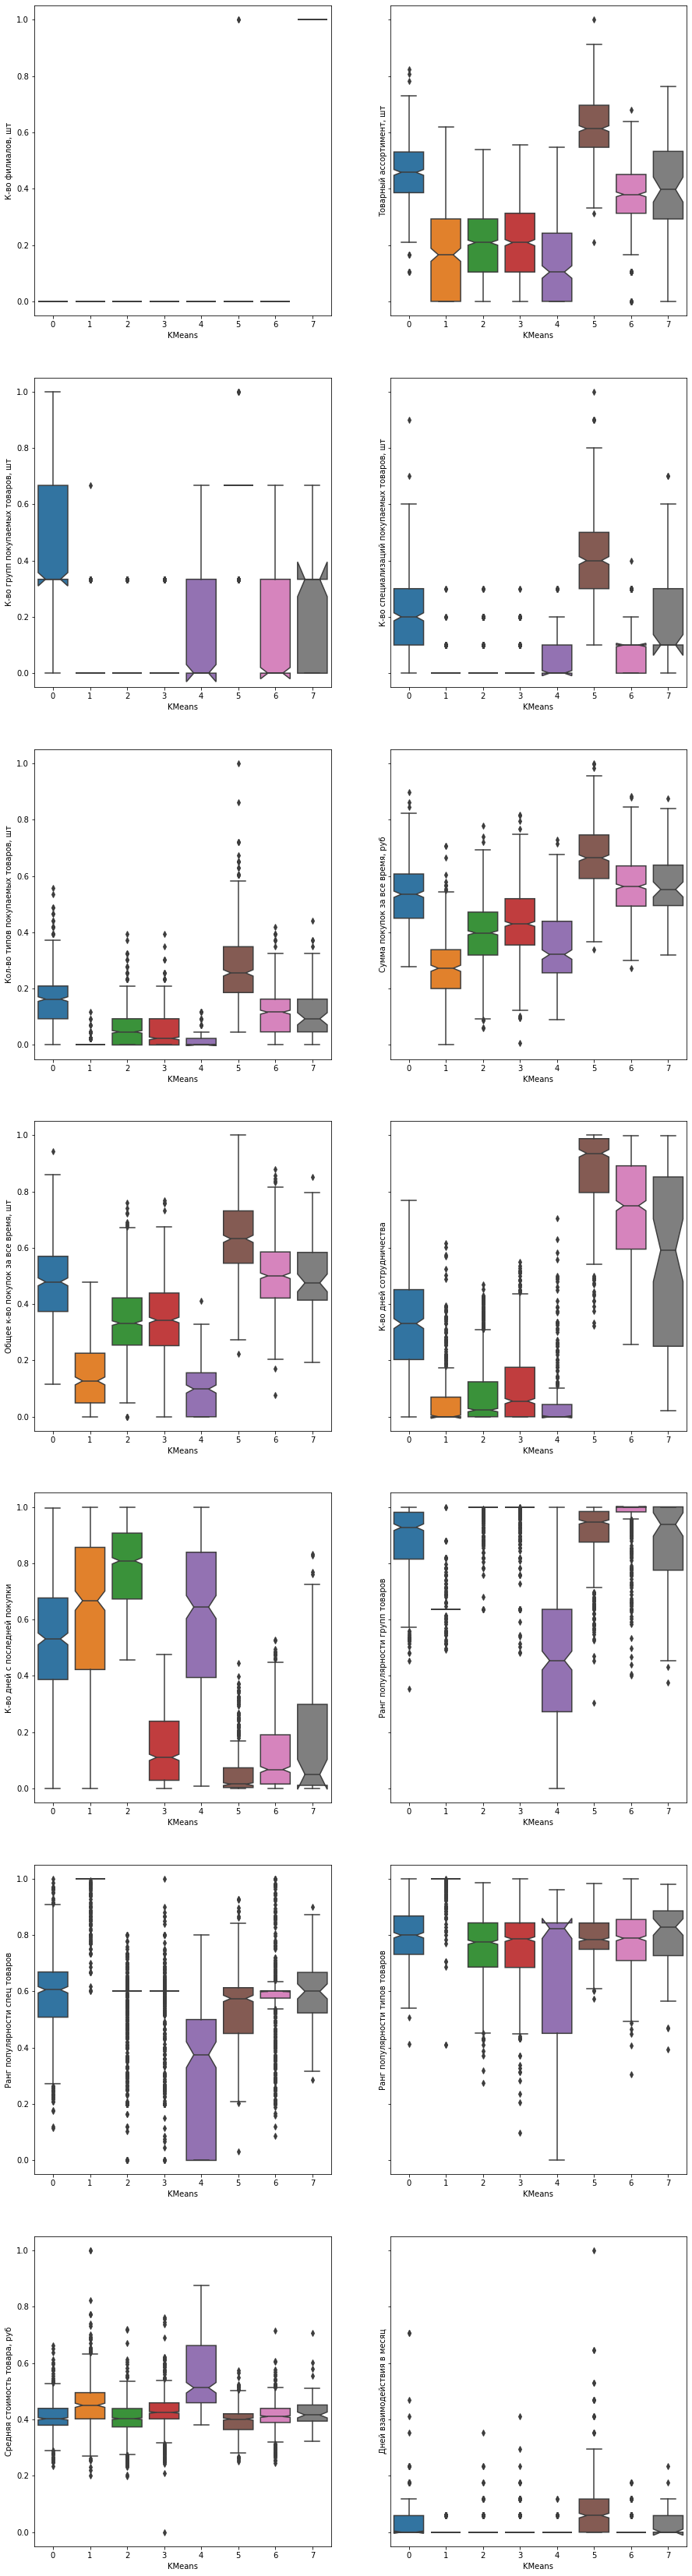

In [177]:
# Рассмотрим возможность интерпритации разделения KMeans

work_data_km = data_scaled.copy()
work_data_km['KMeans'] = labels_clast_km

fig, ax = plt.subplots((len(work_data_km.columns)) // 2, 2, figsize=(15, 60), sharey=True)
counter = [(x, y) for x in range(0, 7) for y in range(0, 2)]

for count, col in zip(counter, work_data_km.drop(columns='KMeans')):
    sns.boxplot(ax = ax[count[0], count[1]], data=work_data_km, y=col, x='KMeans', notch = True)


<h3>DBscan</h3>

In [178]:
work_data_db = data_scaled.copy()
work_data_db['DBScan'] = labels_clast_DB

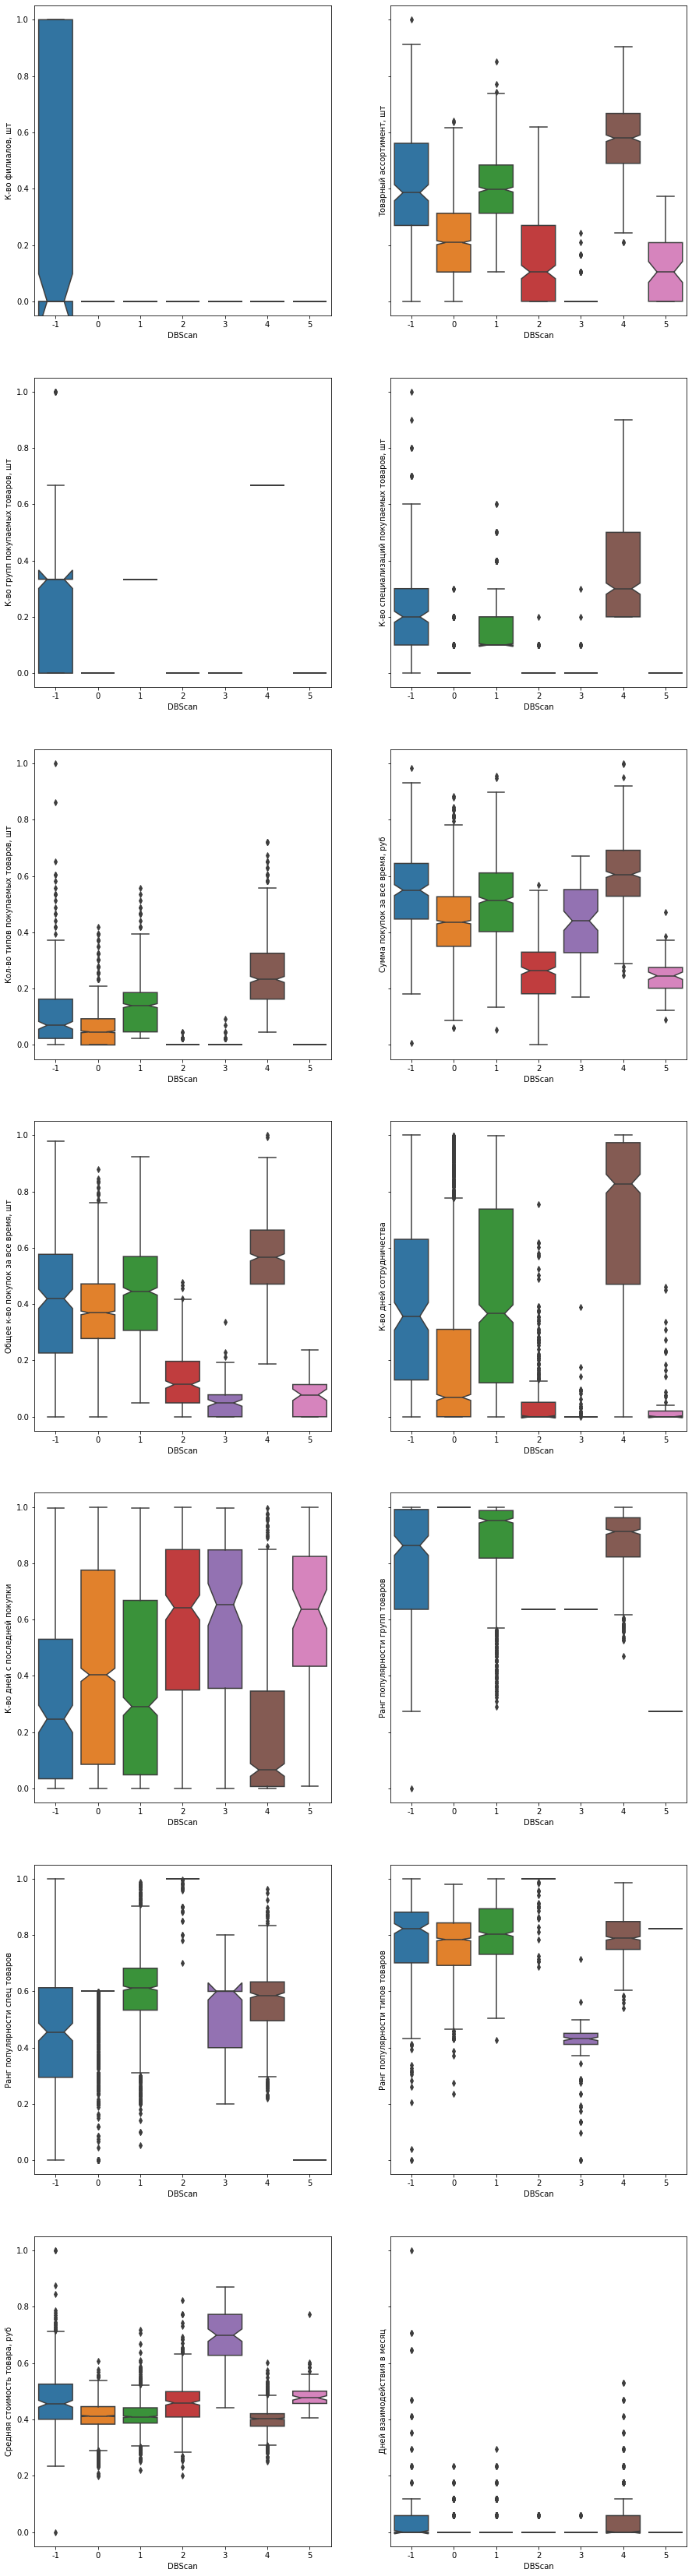

In [179]:
# Рассмотрим возможность интерпритации разделения DBScan

fig, ax = plt.subplots((len(work_data_db.columns)) // 2, 2, figsize=(15, 60), sharey=True)
counter = [(x, y) for x in range(0, 7) for y in range(0, 2)]

for count, col in zip(counter, work_data_db.drop(columns='DBScan')):
    sns.boxplot(ax = ax[count[0], count[1]], data=work_data_db, y=col, x='DBScan', notch = True)

<h3>Интерпретируемость будем определять как среднюю сумму количества групп с стат.значимыми различиями по каждому свойству.</h3>

In [180]:
# Класс считает критерий значимости различий по Манну-Уитни для каждого свойства между каждыми парами групп
# Далее Записывает значимые различия p-value <= 0.05 как 1 - p-value, остальные как 0, и усредняет оценку по количеству групп
# Итоговый скор - среднее по всем свойствам
# Сравинивая итоговые таблицы можно оценить по каким свойствам кластеры подобраны репрезантативнее

class MyClasterScore():
    def __init__(self):
        self.data_in = None
        self.data_columns = None
        self.by=None
        self.results = pd.DataFrame()
        
    def fit(self, data_in, columns, by):
        self.data_in = data_in.copy()
        self.columns = columns
        self.by = by
        self.results.loc[by, columns] = 0
        
    def score(self):
        for idx in self.results.index:
            for col in self.results.columns:
                result_column = []
                for counter, group_1 in enumerate(self.data_in[idx].sort_values().unique()[:-1]):
                    for group_2 in self.data_in[idx].sort_values().unique()[counter + 1:]:
                        mann = mannwhitneyu(self.data_in[self.data_in[idx] == group_1][col],
                                                         self.data_in[self.data_in[idx] == group_2][col])[1]
                        result_column.append(1 - mann if mann <= 0.05 else 0)
                self.results.loc[idx, col] = sum(result_column)/len(result_column)
        self.results['Final_score'] = self.results.mean(axis=1)
        return self.results

In [181]:
score_db = MyClasterScore()
score_km = MyClasterScore()
score_db.fit(work_data_db, work_data_db.drop(columns='DBScan').columns, 'DBScan')
score_km.fit(work_data_km, work_data_km.drop(columns='KMeans').columns, 'KMeans')

In [182]:
results = pd.concat([score_db.score(), score_km.score()])
results

,"К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц,Final_score
DBScan,0.285714,0.904762,0.713046,0.903559,0.999127,0.950598,0.997739,0.902427,0.855065,0.904599,0.950088,0.804228,0.903638,0.902154,0.855482
KMeans,0.284288,0.926283,0.963533,0.892853,0.928571,0.928571,0.892850,0.964277,0.892857,0.928520,0.853630,0.743758,0.891439,0.854882,0.853308


<h3>Оценка разделения практически одинаковая но по разным критериям</h3>

KMeans кластеризовал значимее по категориям:
- К-во групп покупаемых товаров, шт
- К-во дней сотрудничества

DBScan кластеризовал значимее по категориям:
- Кол-во типов покупаемых товаров, шт
- Общее к-во покупок за все время, шт
- Ранг популярности спец товаров


<h3>Разметим результаты кластеризации для дальнейшей интерпретации результатов и применении ее на практике</h3>

In [183]:
# Объединим и сохраним результаты работы
results = work_data_db[['DBScan']].join(work_data_km[['KMeans']])
# DBScan имеет группу -1 отрывы, которые мы определили как отдельную группу, поэтому сделаем нумерацию всех групп от 0
results['DBScan'] = results['DBScan'] + 1

In [184]:
results

,DBScan,KMeans
ID,,
0,0,5
1,1,2
2,5,0
3,2,4
4,1,6
...,...,...
4541,1,2
4542,2,1
4543,1,2


In [185]:
final = data.join(results)

In [186]:
final

,"К-во филиалов, шт","Товарный ассортимент, шт","К-во групп покупаемых товаров, шт","К-во специализаций покупаемых товаров, шт","Кол-во типов покупаемых товаров, шт","Сумма покупок за все время, руб","Общее к-во покупок за все время, шт",К-во дней сотрудничества,К-во дней с последней покупки,Ранг популярности групп товаров,Ранг популярности спец товаров,Ранг популярности типов товаров,"Средняя стоимость товара, руб",Дней взаимодействия в месяц,DBScan,KMeans
ID,,,,,,,,,,,,,,,,
0,2,5.932245,4,9,44,16.373826,10.995142,1787,0,3.974518,3.184423,50.840484,5.378684,18.0,0,5
1,1,1.945910,1,1,5,11.697577,6.016157,135,1773,4.000000,4.000000,43.979167,5.681420,2.0,1,2
2,1,3.610918,3,4,5,11.847050,4.890349,107,1779,3.215385,2.892308,55.630769,6.956701,2.0,5,0
3,1,1.791759,2,3,3,10.162787,1.791759,69,1108,2.500000,2.833333,48.166667,8.371027,1.0,2,4
4,1,2.890372,1,1,3,11.553238,5.323010,1038,647,4.000000,4.000000,54.097826,6.230228,1.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,1,2.197225,1,1,1,11.989481,5.641907,372,1456,4.000000,4.000000,54.000000,6.347574,1.0,1,2
4542,1,1.945910,2,2,2,10.161483,2.302585,10,133,2.857143,5.285714,60.714286,7.858898,2.0,2,1
4543,1,0.000000,1,1,1,7.028556,1.386294,1,1423,4.000000,4.000000,49.000000,5.642262,1.0,1,2


<h3>Визуализируем различия в разделении:</h3>

<Figure size 720x720 with 0 Axes>

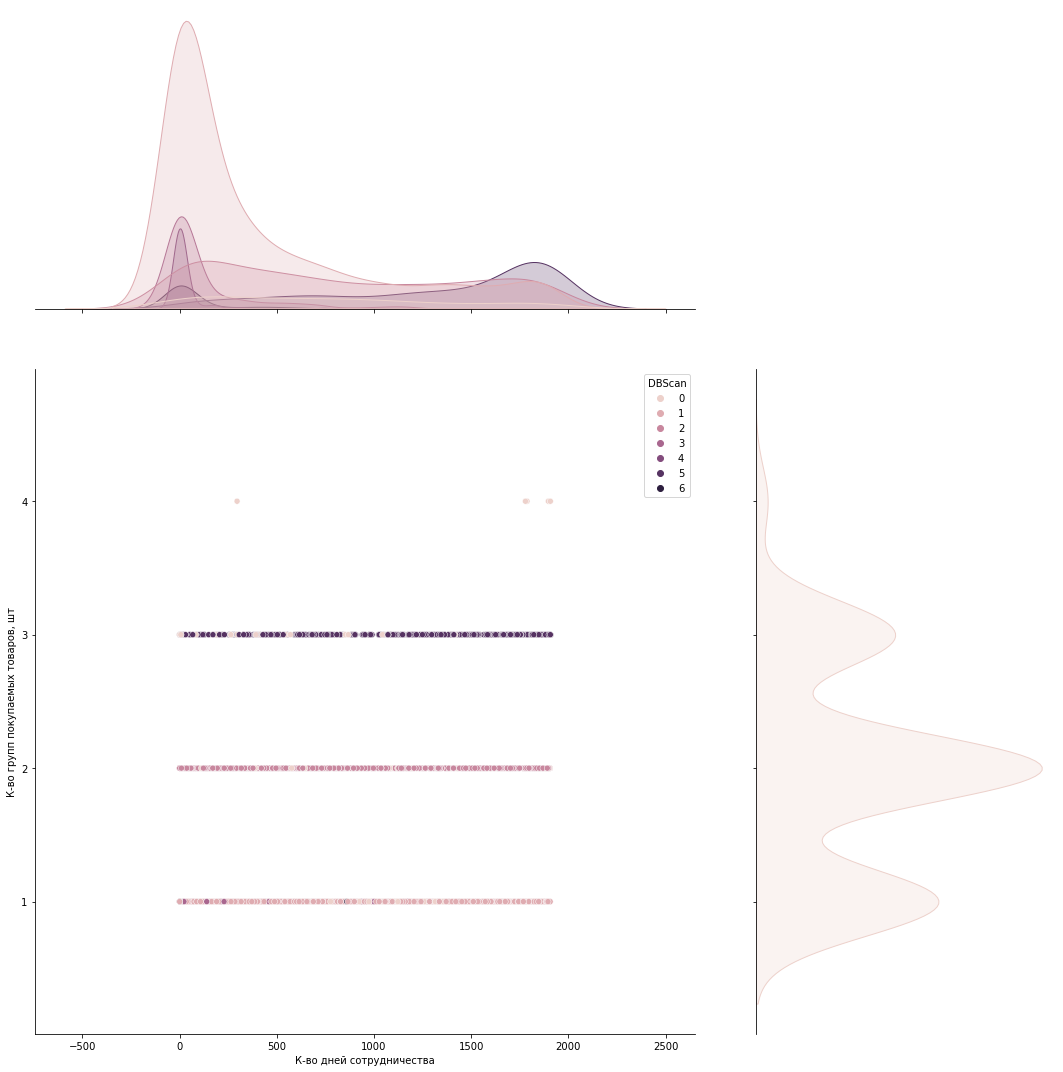

In [187]:
plt.figure(figsize=(10, 10))
sns.jointplot(data = final, 
              x = 'К-во дней сотрудничества', 
              y = 'К-во групп покупаемых товаров, шт', 
              hue='DBScan', ratio=2, height = 15)
plt.xlabel('К-во дней сотрудничества')
plt.ylabel('К-во групп покупаемых товаров, шт')
plt.show()

<Figure size 720x720 with 0 Axes>

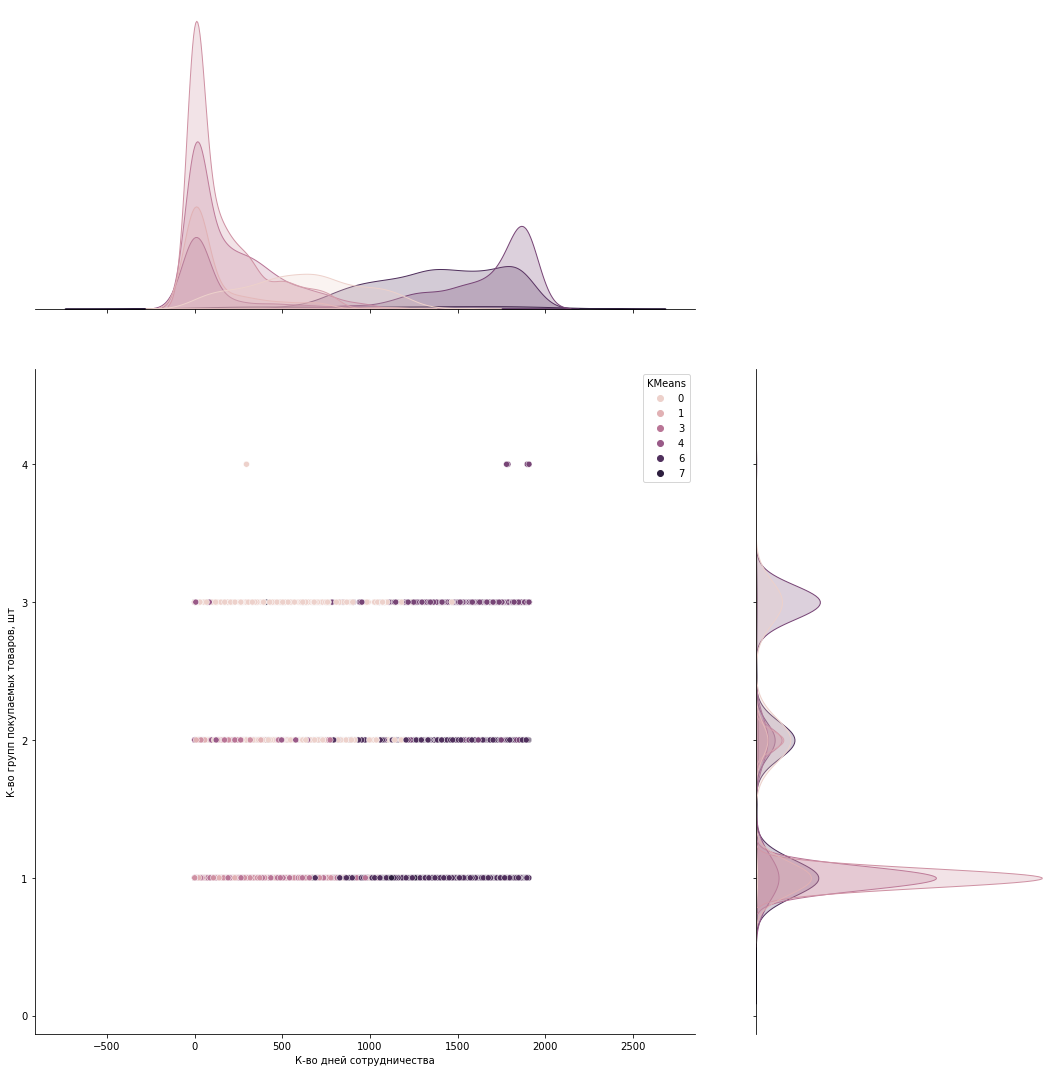

In [188]:
plt.figure(figsize=(10, 10))
sns.jointplot(data = final, 
              x = 'К-во дней сотрудничества', 
              y = 'К-во групп покупаемых товаров, шт', 
              hue='KMeans', ratio=2, height = 15)
plt.xlabel('К-во дней сотрудничества')
plt.ylabel('К-во групп покупаемых товаров, шт')
plt.show()

<Figure size 720x720 with 0 Axes>

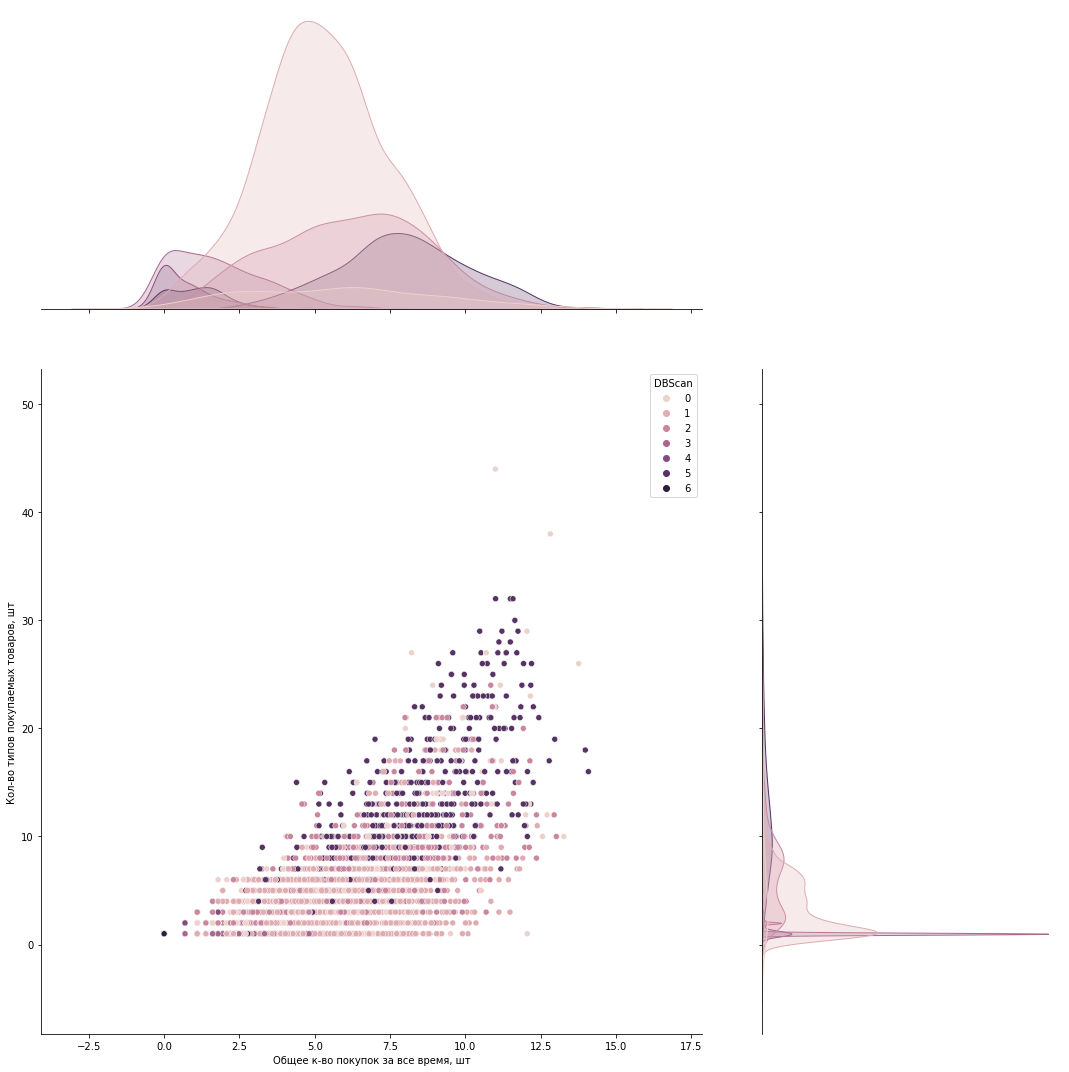

In [189]:
plt.figure(figsize=(10, 10))
sns.jointplot(data = final, 
              x = 'Общее к-во покупок за все время, шт', 
              y = 'Кол-во типов покупаемых товаров, шт', 
              hue='DBScan', ratio=2, height = 15)
plt.xlabel('Общее к-во покупок за все время, шт')
plt.ylabel('Кол-во типов покупаемых товаров, шт')
plt.show()

<Figure size 720x720 with 0 Axes>

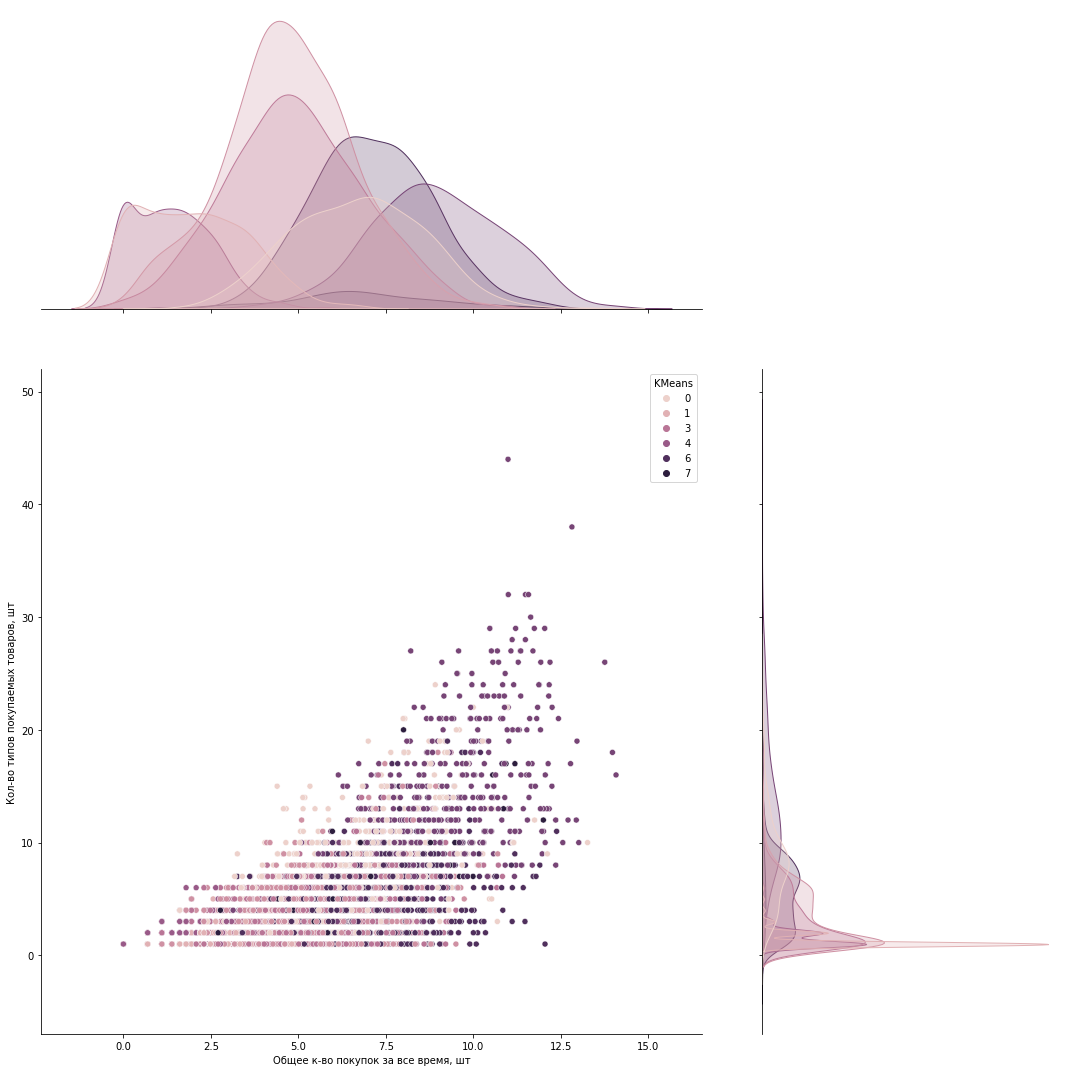

In [190]:
plt.figure(figsize=(10, 10))
sns.jointplot(data = final, 
              x = 'Общее к-во покупок за все время, шт', 
              y = 'Кол-во типов покупаемых товаров, шт', 
              hue='KMeans', ratio=2, height = 15)
plt.xlabel('Общее к-во покупок за все время, шт')
plt.ylabel('Кол-во типов покупаемых товаров, шт')
plt.show()

Как видно из визуализаций выше, алгоритмы нашли не совсем очевидные паттерны разделения.

-------------